In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
import pandas as pd
from src.config import TRANSFORMED_DATA_DIR

df = pd.read_parquet(TRANSFORMED_DATA_DIR / "tabular_data.parquet")
df

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id,target
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2023-01-29,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-01-30,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-01-31,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-02-01,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-02-02,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87615,25,14,5,3,7,16,53,133,126,136,...,62,62,58,50,48,42,37,2023-12-27,263,12
87616,30,7,9,6,5,23,58,123,136,108,...,64,79,65,71,72,75,35,2023-12-28,263,19
87617,50,26,17,9,8,11,43,116,137,132,...,81,78,60,85,63,62,37,2023-12-29,263,38
87618,117,88,39,19,14,12,27,37,70,97,...,84,75,100,98,88,77,69,2023-12-30,263,59


In [4]:
from datetime import datetime

from src.data_utils import split_time_series_data

X_train, y_train, X_test, y_test = split_time_series_data(
    df,
    cutoff_date=datetime(2023, 9, 1, 0, 0, 0),
    target_column="target"
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55900, 674)
(55900,)
(31720, 674)
(31720,)


In [5]:
import numpy as np

class BaselineModelPreviousHour:

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass

    def predict(self, X_test: pd.DataFrame) -> np.array:
        return X_test["rides_t-1"]

In [6]:
model = BaselineModelPreviousHour()
predictions = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_test, predictions)
print(f"{test_mae:.4f}")

6.7109


In [8]:
from src.experiment_utils import set_mlflow_tracking, log_model_to_mlflow
from dotenv import load_dotenv
load_dotenv() 

mlflow = set_mlflow_tracking()


INFO:src.experiment_utils:MLflow tracking URI and credentials set.


In [9]:
log_model_to_mlflow(model, X_test, "BaselineModelPreviousHour", "mean_absolute_error", score=test_mae)

2025/05/24 23:08:26 INFO mlflow.tracking.fluent: Experiment with name 'BaselineModelPreviousHour' does not exist. Creating a new experiment.
INFO:src.experiment_utils:Experiment set to: BaselineModelPreviousHour
INFO:src.experiment_utils:Logged mean_absolute_error: 6.7109394703657
C:\Users\tarun\anaconda3\envs\sp25_taxi_main\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-w

2025/05/24 23:10:22 INFO mlflow.models.model: Found the following environment variables used during model inference: [HOPSWORKS_API_KEY]. Please check if you need to set them when deploying the model. To disable this message, set environment variable `MLFLOW_RECORD_ENV_VARS_IN_MODEL_LOGGING` to `false`.
Successfully registered model 'BaselineModelPreviousHour'.
2025/05/24 23:18:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: BaselineModelPreviousHour, version 1
Created version '1' of model 'BaselineModelPreviousHour'.
INFO:src.experiment_utils:Model logged with name: BaselineModelPreviousHour


🏃 View run treasured-jay-732 at: https://dagshub.com/tarunnallagari/sp25_taxi.mlflow/#/experiments/0/runs/30c9c24cfa274c8396bbeae118bfaf03
🧪 View experiment at: https://dagshub.com/tarunnallagari/sp25_taxi.mlflow/#/experiments/0


In [10]:
import numpy as np

class BaselineModelPreviousWeek:

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass

    def predict(self, X_test: pd.DataFrame) -> np.array:
        return X_test[f"rides_t-{7*24}"]


In [11]:
model = BaselineModelPreviousWeek()
predictions = model.predict(X_test)

In [12]:
test_mae = mean_absolute_error(y_test, predictions)
print(f"{test_mae:.4f}")

5.2301


In [13]:
log_model_to_mlflow(model, X_test, "BaselineModelPreviousWeek", "mean_absolute_error", score=test_mae)

2025/05/24 23:18:39 INFO mlflow.tracking.fluent: Experiment with name 'BaselineModelPreviousWeek' does not exist. Creating a new experiment.
INFO:src.experiment_utils:Experiment set to: BaselineModelPreviousWeek
INFO:src.experiment_utils:Logged mean_absolute_error: 5.230075662042875
C:\Users\tarun\anaconda3\envs\sp25_taxi_main\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers

Successfully registered model 'BaselineModelPreviousWeek'.
2025/05/24 23:29:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: BaselineModelPreviousWeek, version 1
Created version '1' of model 'BaselineModelPreviousWeek'.
INFO:src.experiment_utils:Model logged with name: BaselineModelPreviousWeek


🏃 View run delicate-asp-266 at: https://dagshub.com/tarunnallagari/sp25_taxi.mlflow/#/experiments/1/runs/23972c003d2d4ade8daabc643737a1f0
🧪 View experiment at: https://dagshub.com/tarunnallagari/sp25_taxi.mlflow/#/experiments/1


In [14]:
import numpy as np
import pandas as pd

class BaselineModelLast4Weeks:
    """
    A baseline model that predicts the average of the last 4 weeks (28 days)
    for each test instance.
    """

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        """
        The fit method is not used in this baseline model as it does not learn
        from the training data.
        """
        pass

    def predict(self, X_test: pd.DataFrame) -> np.array:
        """
        Predicts the average of the last 4 weeks (28 days) for each test instance.

        Parameters:
            X_test (pd.DataFrame): The test DataFrame containing lagged features
                                   (e.g., rides_t-{7*24}   , rides_t-{14*24}, etc.).

        Returns:
            np.array: An array of predictions based on the average of the last 4 weeks.
        """
        # Define the columns for the last 4 weeks
        last_4_weeks_columns = [
            f"rides_t-{7*24}",  # 1 week ago
            f"rides_t-{14*24}", # 2 weeks ago
            f"rides_t-{21*24}", # 3 weeks ago
            f"rides_t-{28*24}"  # 4 weeks ago
        ]

        # Ensure the required columns exist in the test DataFrame
        for col in last_4_weeks_columns:
            if col not in X_test.columns:
                raise ValueError(f"Missing required column: {col}")

        # Calculate the average of the last 4 weeks
        predictions = X_test[last_4_weeks_columns].mean(axis=1)

        return predictions.to_numpy()

In [15]:
model = BaselineModelLast4Weeks()
predictions = model.predict(X_test)

In [16]:
X_test[X_test['pickup_location_id']==43] 

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-8,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id
5002,12,6,1,1,0,7,8,46,41,48,...,131,74,82,62,64,34,38,12,2023-09-01,43
5003,13,7,1,0,0,4,2,11,28,35,...,122,113,80,107,67,58,39,9,2023-09-02,43
5004,14,5,3,1,0,3,7,13,12,27,...,174,166,174,142,86,63,53,13,2023-09-03,43
5005,2,2,0,0,1,5,13,36,34,39,...,169,144,90,61,45,28,31,7,2023-09-04,43
5006,3,0,0,0,1,4,5,44,61,59,...,136,145,85,46,33,28,9,8,2023-09-05,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,3,0,1,0,1,6,13,54,106,83,...,205,132,64,49,44,31,14,10,2023-12-27,43
5120,6,2,2,0,1,7,8,58,84,90,...,97,57,73,29,48,42,24,7,2023-12-28,43
5121,20,7,2,0,3,3,13,54,67,90,...,239,128,73,52,50,43,30,17,2023-12-29,43
5122,10,8,3,1,3,0,8,19,35,67,...,200,185,160,133,158,69,33,19,2023-12-30,43


In [17]:
test_mae = mean_absolute_error(y_test, predictions)
print(f"{test_mae:.4f}")

4.5444


In [18]:
log_model_to_mlflow(model, X_test, "BaselineModelLast4Weeks", "mean_absolute_error", score=test_mae)

2025/05/24 23:29:33 INFO mlflow.tracking.fluent: Experiment with name 'BaselineModelLast4Weeks' does not exist. Creating a new experiment.
INFO:src.experiment_utils:Experiment set to: BaselineModelLast4Weeks
INFO:src.experiment_utils:Logged mean_absolute_error: 4.5443647540983605
C:\Users\tarun\anaconda3\envs\sp25_taxi_main\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-wi

Successfully registered model 'BaselineModelLast4Weeks'.
2025/05/24 23:40:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: BaselineModelLast4Weeks, version 1
Created version '1' of model 'BaselineModelLast4Weeks'.
INFO:src.experiment_utils:Model logged with name: BaselineModelLast4Weeks


🏃 View run defiant-ant-945 at: https://dagshub.com/tarunnallagari/sp25_taxi.mlflow/#/experiments/2/runs/2e0c91280c6a41ceb02c5283a36e846f
🧪 View experiment at: https://dagshub.com/tarunnallagari/sp25_taxi.mlflow/#/experiments/2


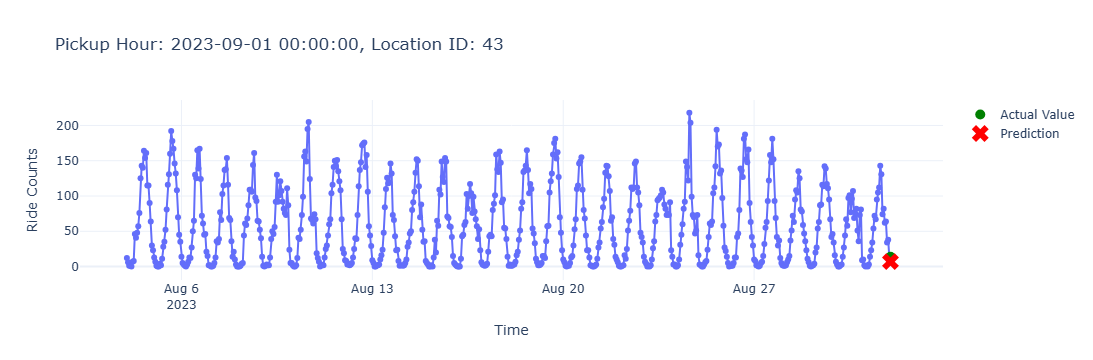

In [19]:
from src.plot_utils import plot_aggregated_time_series

plot_aggregated_time_series(X_test, y_test, 5002, predictions)